In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from collections import defaultdict
import os


In [2]:
import pandas as pd

df_el = pd.read_csv('datasets/el-projections.tsv', sep='\t', names=['text', 'emotion'], header=None)
df_en = pd.read_csv('datasets/en-annotated.tsv', sep='\t', names=['text', 'emotion'], header=None)
df_fr = pd.read_csv('datasets/fr-projections.tsv', sep='\t', names=['text', 'emotion'], header=None)
df_pl = pd.read_csv('datasets/pl-projections.tsv', sep='\t', names=['text', 'emotion'], header=None)
df_pt = pd.read_csv('datasets/pt-projections.tsv', sep='\t', names=['text', 'emotion'], header=None)
df_ro = pd.read_csv('datasets/ro-projections.tsv', sep='\t', names=['text', 'emotion'], header=None)
df_sr = pd.read_csv('datasets/sr-projections.tsv', sep='\t', names=['text', 'emotion'], header=None)
df_bg = pd.read_csv('datasets/bg-projections.tsv', sep='\t', names=['text', 'emotion'], header=None)
df_cs = pd.read_csv('datasets/cs-projections.tsv', sep='\t', names=['text', 'emotion'], header=None)
df_br = pd.read_csv('datasets/br-projections.tsv', sep='\t', names=['text', 'emotion'], header=None)

df_el['language'] = 'Greek'
df_en['language'] = 'English'
df_br['language'] = 'Brazilian'
df_fr['language'] = 'French'
df_pl['language'] = 'Polish'
df_pt['language'] = 'Portuguese'
df_ro['language'] = 'Romanian'
df_sr['language'] = 'Serbian'
df_bg['language'] = 'Bulgarian'
df_cs['language'] = 'Czech'

In [3]:
df_el_train, df_el_test = train_test_split(df_el, test_size=0.2, random_state=42)
df_en_train, df_en_test = train_test_split(df_en, test_size=0.2, random_state=42)
df_br_train, df_br_test = train_test_split(df_br, test_size=0.2, random_state=42)
df_cs_train, df_cs_test = train_test_split(df_cs, test_size=0.2, random_state=42)
df_fr_train, df_fr_test = train_test_split(df_fr, test_size=0.2, random_state=42)
df_pl_train, df_pl_test = train_test_split(df_pl, test_size=0.2, random_state=42)
df_pt_train, df_pt_test = train_test_split(df_pt, test_size=0.2, random_state=42)
df_ro_train, df_ro_test = train_test_split(df_ro, test_size=0.2, random_state=42)
df_sr_train, df_sr_test = train_test_split(df_sr, test_size=0.2, random_state=42)
df_bg_train, df_bg_test = train_test_split(df_bg, test_size=0.2, random_state=42)


In [4]:
df_train = pd.concat([df_el_train, df_en_train, df_br_train, df_cs_train, 
df_fr_train, df_pl_train, df_pt_train, df_ro_train, df_sr_train, df_bg_train], ignore_index=True)

df_test = pd.concat([df_el_test, df_en_test, df_br_test, df_cs_test, 
df_fr_test, df_pl_test, df_pt_test, df_ro_test, df_sr_test, df_bg_test], ignore_index=True)

In [5]:
# Check for missing values in train dataset
missing_values_train = df_train.isnull().sum()
print("Missing values in df_train:")
print(missing_values_train)

# Check for missing values in test dataset
missing_values_test = df_test.isnull().sum()
print("\nMissing values in df_test:")
print(missing_values_test)


Missing values in df_train:
text        8
emotion     0
language    0
dtype: int64

Missing values in df_test:
text        1
emotion     0
language    0
dtype: int64


In [6]:
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

C:\Users\Sayantan Datta\AppData\Local\Temp\ipykernel_193028\1466508722.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_counts.index, y=language_counts.values, palette="viridis")


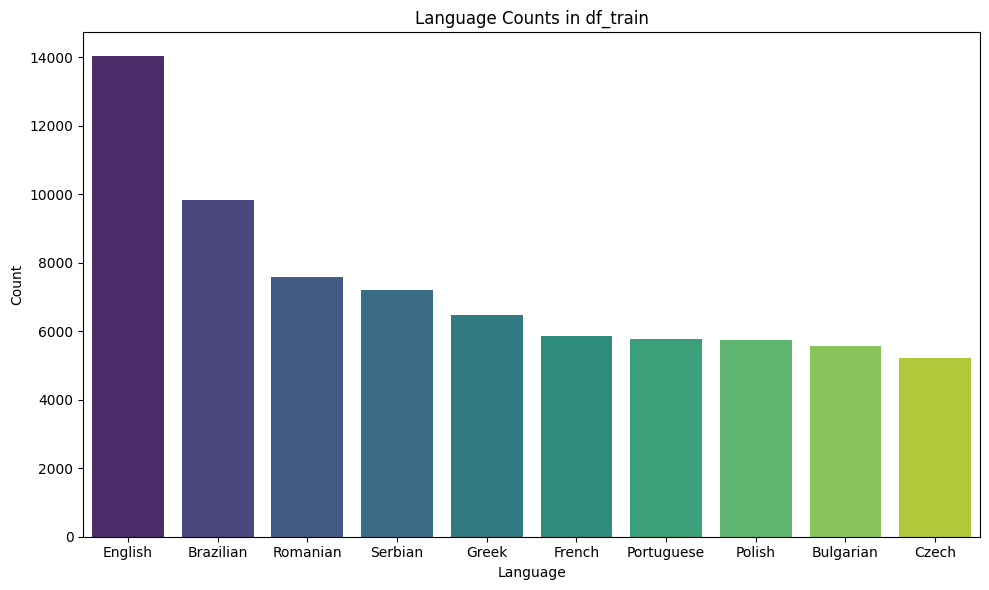

In [7]:
# Calculate language counts in df_train
language_counts = df_train['language'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=language_counts.index, y=language_counts.values, palette="viridis")
plt.title('Language Counts in df_train')
plt.xlabel('Language')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [8]:
# Export the entire training set as one file
df_train.to_csv('datasets/train.tsv', sep='\t', index=False)
print(f"Exported {len(df_train)} rows to datasets/train.tsv")

# Create a directory for the test files by language (if it doesn't exist)
test_dir = 'datasets/test_by_language'
os.makedirs(test_dir, exist_ok=True)

# Export separate test files for each language
for language in df_test['language'].unique():
    # Filter test data by language
    lang_test = df_test[df_test['language'] == language]
    
    # Create a clean filename (lowercase, replace spaces with underscores)
    filename = language.lower().replace(' ', '_')
    output_path = f"{test_dir}/{filename}_test.tsv"
    
    # Export to TSV
    lang_test.to_csv(output_path, sep='\t', index=False)
    print(f"Exported {len(lang_test)} test rows for {language} to {output_path}")

print("Export complete!")

Exported 73237 rows to datasets/train.tsv
Exported 1617 test rows for Greek to datasets/test_by_language/greek_test.tsv
Exported 3506 test rows for English to datasets/test_by_language/english_test.tsv
Exported 2460 test rows for Brazilian to datasets/test_by_language/brazilian_test.tsv
Exported 1303 test rows for Czech to datasets/test_by_language/czech_test.tsv
Exported 1462 test rows for French to datasets/test_by_language/french_test.tsv
Exported 1436 test rows for Polish to datasets/test_by_language/polish_test.tsv
Exported 1444 test rows for Portuguese to datasets/test_by_language/portuguese_test.tsv
Exported 1895 test rows for Romanian to datasets/test_by_language/romanian_test.tsv
Exported 1797 test rows for Serbian to datasets/test_by_language/serbian_test.tsv
Exported 1395 test rows for Bulgarian to datasets/test_by_language/bulgarian_test.tsv
Export complete!


C:\Users\Sayantan Datta\AppData\Local\Temp\ipykernel_193028\2700578742.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="emotion", y="count", data=emotion_df, palette="viridis")


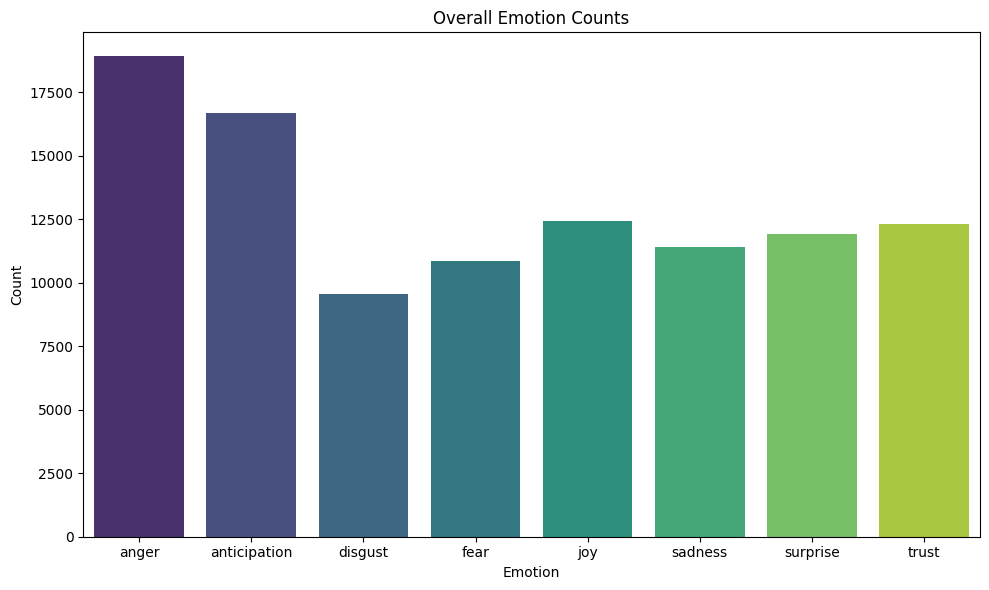

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Define mapping from emotion code to emotion label
emotion_mapping = {
    "0": "neutral",
    "1": "anger",
    "2": "anticipation",
    "3": "disgust",
    "4": "fear",
    "5": "joy",
    "6": "sadness",
    "7": "surprise",
    "8": "trust"
}

# Initialize a counter for emotions
emotion_counter = Counter()

# Iterate over each row in the training data
for idx, row in df_train.iterrows():
    # Get the emotion value as string
    em_str = str(row["emotion"]).strip()
    if not em_str:
        continue
    # Split by comma to get multiple emotion codes if present
    emotion_numbers = [token.strip() for token in em_str.split(',')]
    for num in emotion_numbers:
        label = emotion_mapping.get(num)
        if label:
            emotion_counter[label] += 1

# Convert the counter to a DataFrame for easier plotting
emotion_df = pd.DataFrame(list(emotion_counter.items()), columns=['emotion', 'count'])
emotion_df = emotion_df.sort_values('emotion')

plt.figure(figsize=(10, 6))
sns.barplot(x="emotion", y="count", data=emotion_df, palette="viridis")
plt.title("Overall Emotion Counts")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [ ]:
# Export the entire training set as one file
df_train.to_csv('datasets/train.tsv', sep='\t', index=False)
print(f"Exported {len(df_train)} rows to datasets/train.tsv")


Exported 73237 rows to datasets/train.tsv
Exported 1617 test rows for Greek to datasets/test_by_language/greek_test.tsv
Exported 3506 test rows for English to datasets/test_by_language/english_test.tsv
Exported 2460 test rows for Brazilian to datasets/test_by_language/brazilian_test.tsv
Exported 1303 test rows for Czech to datasets/test_by_language/czech_test.tsv
Exported 1462 test rows for French to datasets/test_by_language/french_test.tsv
Exported 1436 test rows for Polish to datasets/test_by_language/polish_test.tsv
Exported 1444 test rows for Portuguese to datasets/test_by_language/portuguese_test.tsv
Exported 1895 test rows for Romanian to datasets/test_by_language/romanian_test.tsv
Exported 1797 test rows for Serbian to datasets/test_by_language/serbian_test.tsv
Exported 1395 test rows for Bulgarian to datasets/test_by_language/bulgarian_test.tsv
Export complete!


In [10]:
# Export the entire test set as one file
df_test.to_csv('datasets/test.tsv', sep='\t', index=False)
print(f"Exported {len(df_test)} rows to datasets/test.tsv")
print("Export complete!")

Exported 18315 rows to datasets/test.tsv
Export complete!
